<a href="https://colab.research.google.com/github/waliapriya/Deep-Neural-Network/blob/main/CNN_Model_CIFAR10_small_images_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network (CNN) on CIFAR10 dataset

#### Convolutional Neural Network
- A CNN is a kind of network architecture for deep learning algorithms and is specifically used for image recognition and tasks that involve the processing of pixel data. It is made up of multiple layers, including convolutional layers, pooling layers, and fully connected layers.
- The convolutional layers are the key component of a CNN, where filters are applied to the input image to extract features such as edges, textures, and shapes. The output of the convolutional layers is then passed through pooling layers, which are used to down-sample the feature maps, reducing the spatial dimensions while retaining the most important information. The output of the pooling layers is then passed through one or more fully connected layers, which are used to make a prediction or classify the image.

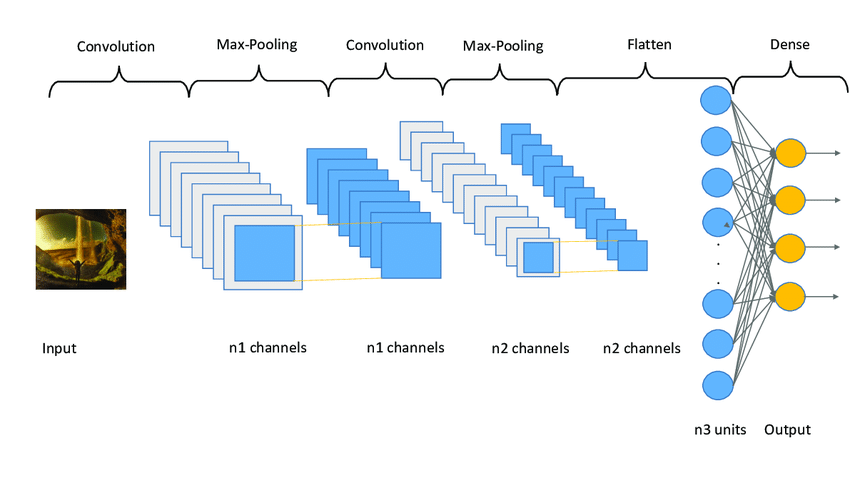

#### Objective
- The objective is to process image and build CNN Model using LeNet -5, AlexNet & VGG16.


#### Dataset source & brief
- The dataset has been sourced from keras and it is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

#### Import the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


#### Import Deep Learning libraries

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import *
from keras import layers, models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras.applications.vgg16 import VGG16

#### Load the dataset

In [3]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [4]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


#### Data Preprocessing

##### 1.  Normalization by Min Max approach

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

##### 2. Encoding

In [6]:
y_train  = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### Data visualization

- Random image visualization

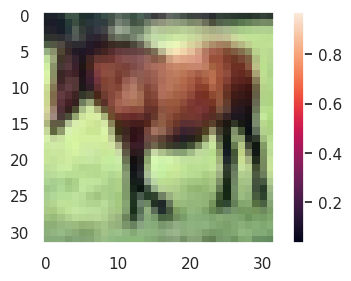

In [7]:
plt.figure(figsize=(5,3))
plt.imshow(x_train[7])
plt.colorbar()
plt.grid(False)
plt.show()

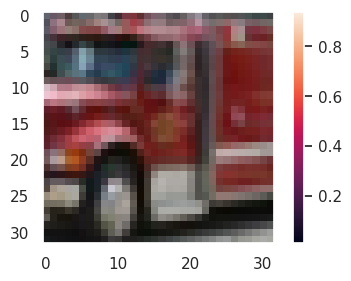

In [8]:
plt.figure(figsize=(5,3))
plt.imshow(x_train[88])
plt.colorbar()
plt.grid(False)
plt.show()

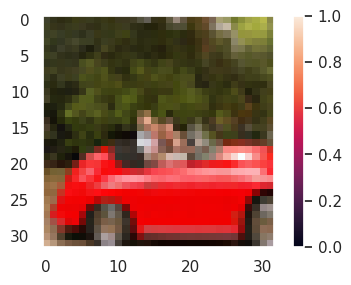

In [9]:
plt.figure(figsize=(5,3))
plt.imshow(x_train[99])
plt.colorbar()
plt.grid(False)
plt.show()

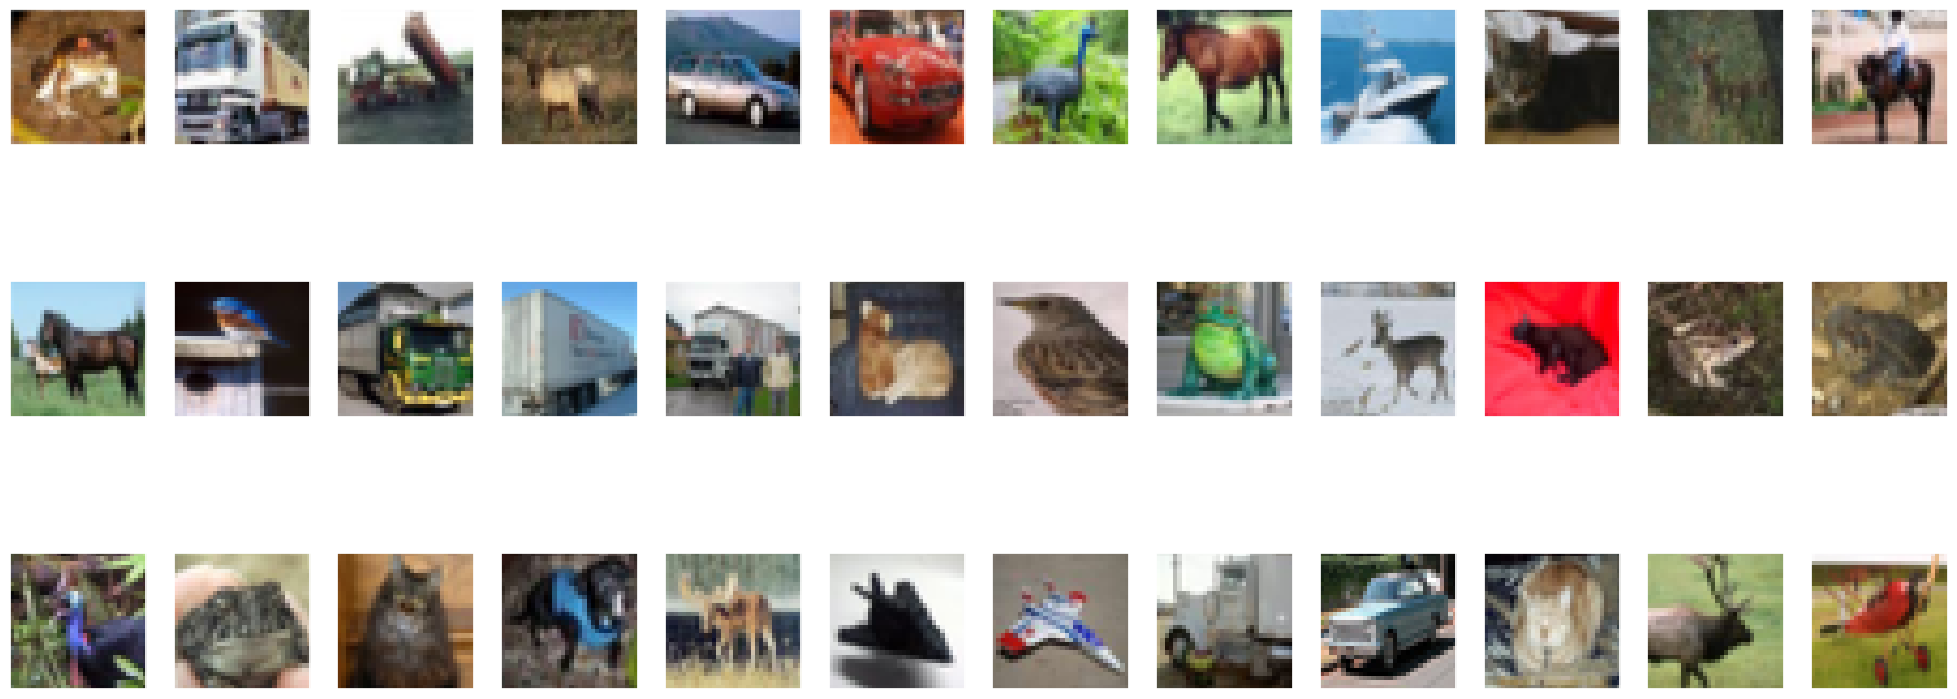

In [10]:
def plot_images(x_train):
    fig = plt.figure(figsize=(25,10))
    for i in range(36):
        ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(x_train[i]))
plot_images(x_train)


#### Modelling

- We will start by building CNN model followed by DNN

#### Model No. 1 - Lenet-5
- Lenet - 5 also known as the Classic Neural Network & was designed by Yann LeCun, Leon Bottou, Yosuha Bengio and Patrick Haffner for handwritten and machine-printed character recognition. As a representative of the early convolutional neural network, LeNet possesses the basic units of convolutional neural network, such as convolutional layer, pooling layer and full connection layer, laying a foundation for the future development of convolutional neural network.

- Architecture

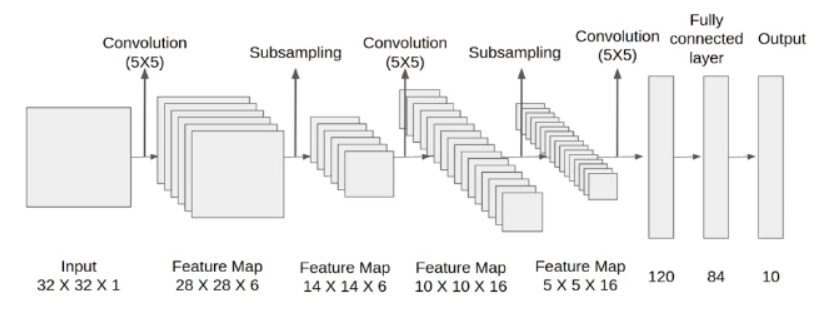

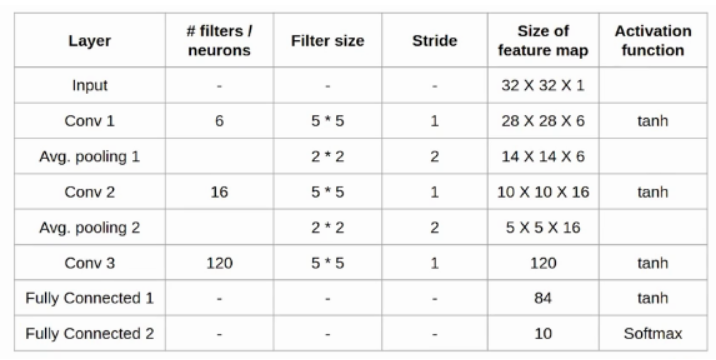

In [11]:
model = Sequential()
# First Convolutional layer
model.add(Conv2D(6, kernel_size=(5,5), strides=1, activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
# First Pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Second Convolutional layer
model.add(Conv2D(16, kernel_size=(5,5), strides=1, activation='relu'))
model.add(BatchNormalization())
# Second Pooling layer
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Third Convolutional layer
#model.add(Conv2D(120, kernel_size=(5,5), strides=1, activation='relu'))
#model.add(BatchNormalization())
model.add(Flatten())

# First hidden layer
model.add(Dense(120, activation='relu'))
# Second hidden layer
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test),
                    verbose=1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 6)         24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 batch_normalization_1 (Bat  (None, 10, 10, 16)        64        
 chNormalization)                                                
                                                        

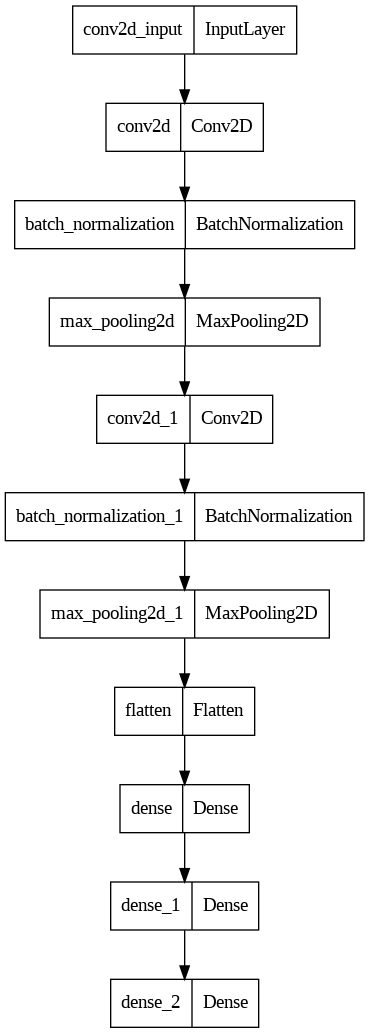

In [39]:
plot_model(model)

#### Check the LeNet - 5 Model's accuracy

In [12]:
Lenet5_accuracy_test = model.evaluate(x_test, y_test)
print('Lenet 5 Test Accuracy: {}'.format(Lenet5_accuracy_test[1]))

313/313 [==============================] - 1s 4ms/step - loss: 1.2328 - accuracy: 0.6027
Lenet 5 Test Accuracy: 0.6026999950408936


In [13]:
Lenet5_accuracy_train = model.evaluate(x_train, y_train)
print('Lenet 5 Train Accuracy: {}'.format(Lenet5_accuracy_train[1]))

1563/1563 [==============================] - 5s 3ms/step - loss: 0.7243 - accuracy: 0.7395
Lenet 5 Train Accuracy: 0.7394999861717224


#### Accuracy Visualization

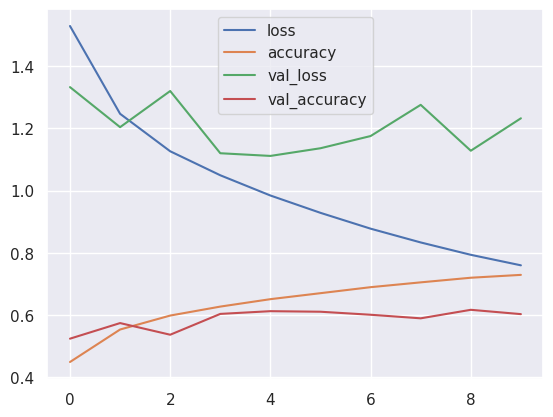

In [14]:
pd.DataFrame(history.history).plot()
plt.show()

#### Plotting the Actual vs Predicted results

In [45]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

313/313 [==============================] - 1s 2ms/step


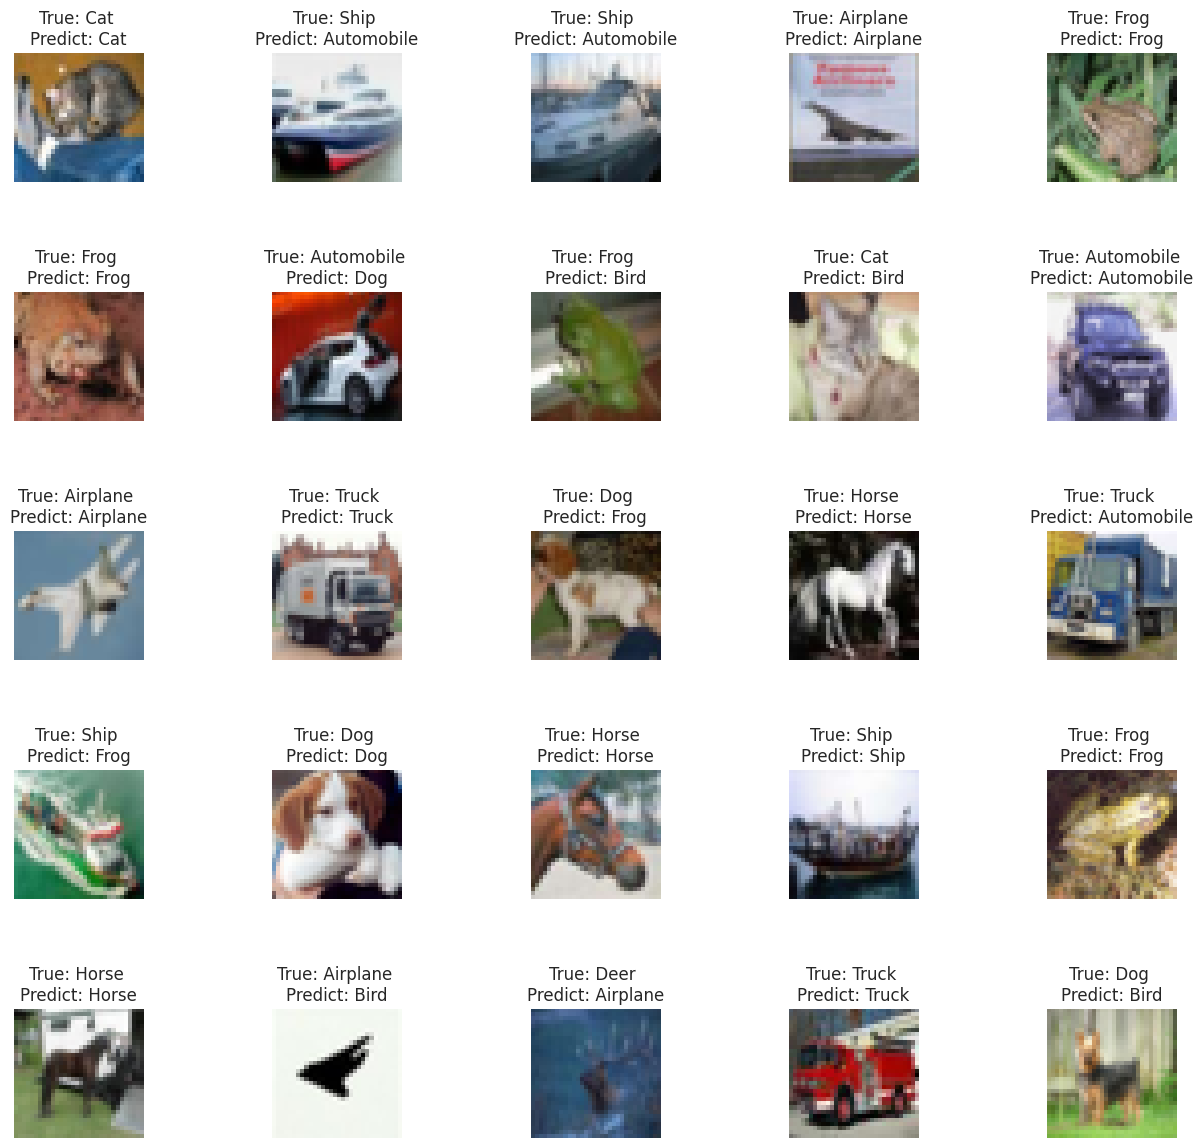

In [48]:
Lenet5_pred = model.predict(x_test)
Lenet5_pred_classes = np.argmax(Lenet5_pred, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[Lenet5_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

#### Model No. 2- AlexNet
- AlexNet is a convolutional neural network (CNN) architecture that was developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It was the first CNN to win the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), a major image recognition competition, and it helped to establish CNNs as a powerful tool for image recognition.
AlexNet consists of several layers of convolutional and pooling layers, followed by fully connected layers. The architecture includes five convolutional layers, three pooling layers, and three fully connected layers.

- Architecture

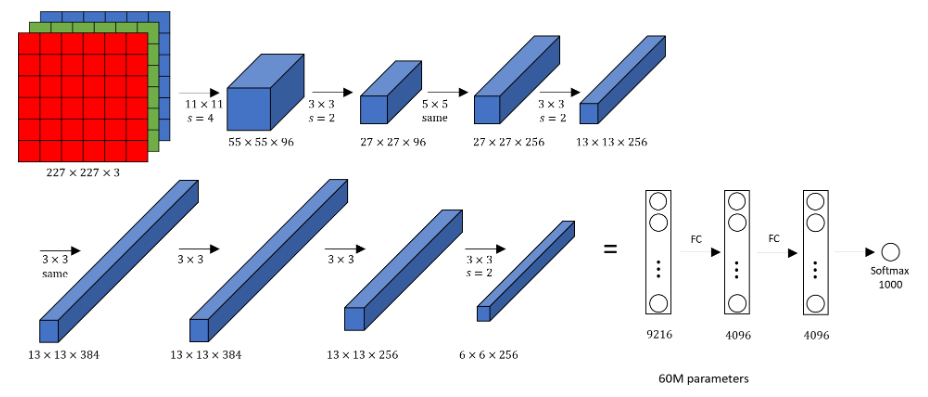

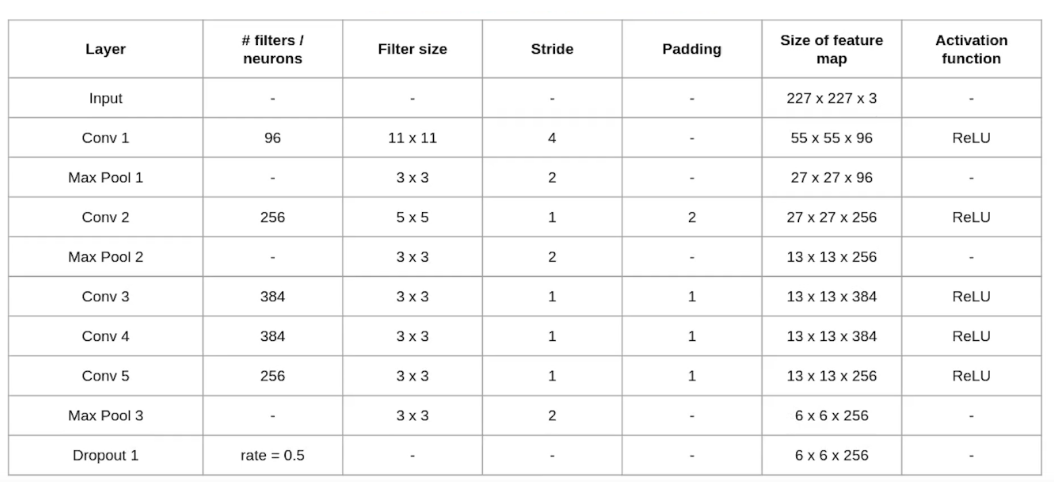

In [15]:
model2 = Sequential()
# First Convolutional layer
model2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
# Second Convolutional layer
model2.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
# First Pooling layer
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
# Third Convolutional layer
model2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
# Fourth Convolutional layer
model2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
# Second Pooling layer
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
# Fifth Convolutional layer
model2.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model2.add(BatchNormalization())
# Third Pooling layer
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.35))
model2.add(Flatten())
# First Hidden layer
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
# Second Hidden layer
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_3 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

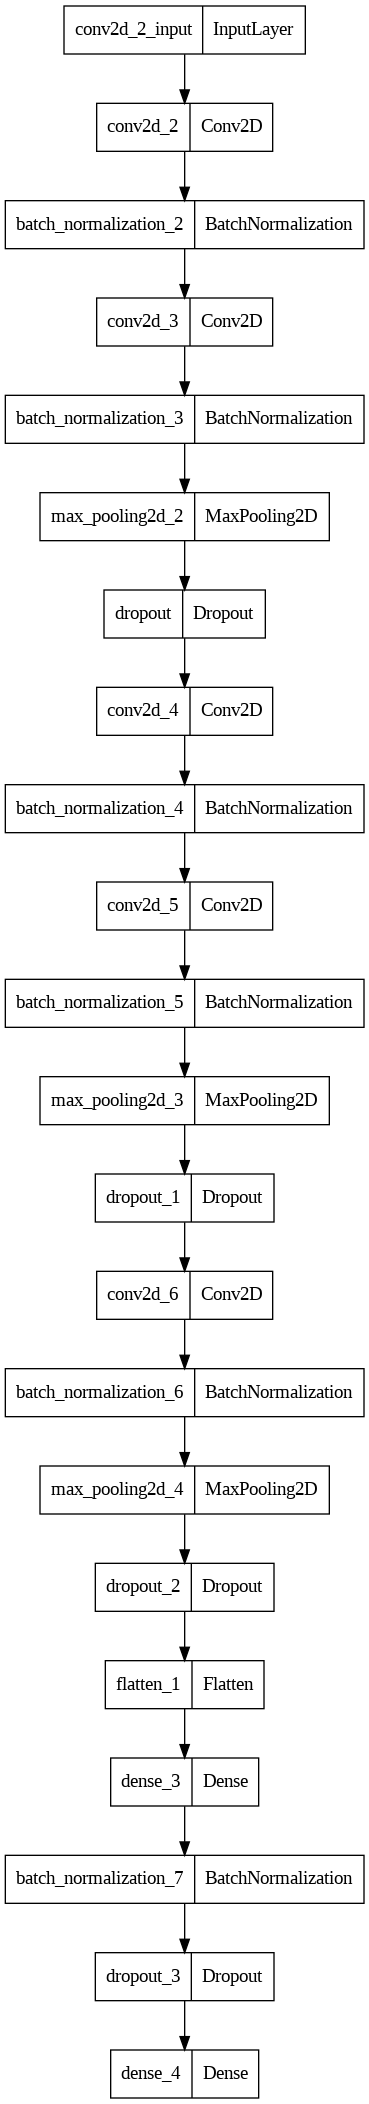

In [38]:
plot_model(model2)

In [16]:
history2 = model2.fit(x_train, y_train, epochs =10, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 37s 19ms/step - loss: 1.5228 - accuracy: 0.4812 - val_loss: 1.1109 - val_accuracy: 0.6100
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9539 - accuracy: 0.6665 - val_loss: 0.8828 - val_accuracy: 0.6855
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7904 - accuracy: 0.7255 - val_loss: 1.0434 - val_accuracy: 0.6543
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6816 - accuracy: 0.7658 - val_loss: 0.6273 - val_accuracy: 0.7881
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6060 - accuracy: 0.7933 - val_loss: 0.8007 - val_accuracy: 0.7266
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5396 - accuracy: 0.8156 - val_loss: 0.5896 - val_accuracy: 0.8012
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.4920 - accuracy: 0.8326 - val_loss: 0.6811 -

In [17]:
Alexnet_accuracy_test = model2.evaluate(x_test, y_test)
print('Alexnet Test Accuracy: {}'.format(Alexnet_accuracy_test[1]))
Alexnet_accuracy_train = model2.evaluate(x_train, y_train)
print('Alexnet Train Accuracy: {}'.format(Alexnet_accuracy_train[1]))


313/313 [==============================] - 2s 7ms/step - loss: 0.4846 - accuracy: 0.8363
Alexnet Test Accuracy: 0.8363000154495239
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2217 - accuracy: 0.9272
Alexnet Train Accuracy: 0.9272000193595886


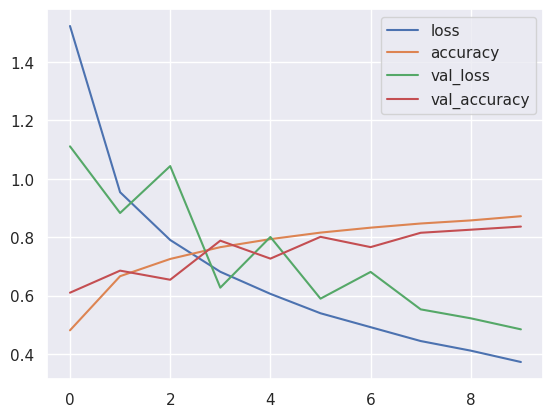

In [18]:
pd.DataFrame(history2.history).plot()
plt.show()

#### Plotting the Actual vs Predicted results

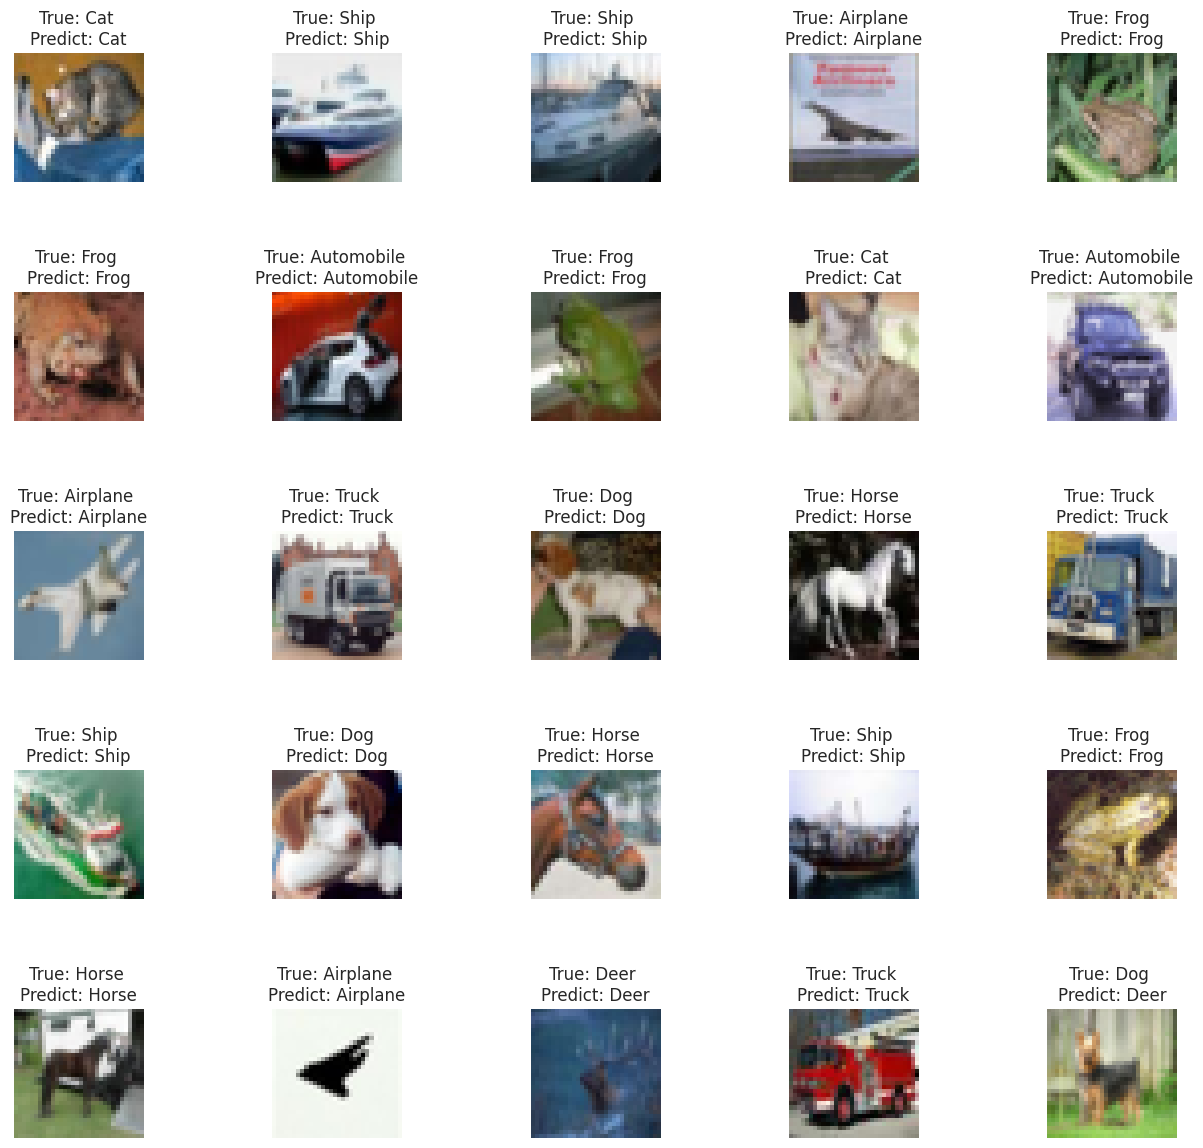

In [46]:
AlexNet_pred = model2.predict(x_test)
AlexNet_pred_classes = np.argmax(AlexNet_pred, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[AlexNet_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

#### Model No. 3 - VGG16
- VGG 16 was proposed by Karen Simonyan and Andrew Zisserman of the Visual Geometry Group Lab of Oxford University in 2014. It is a convolutional neural network that is 16 layers deep.

- Architecture

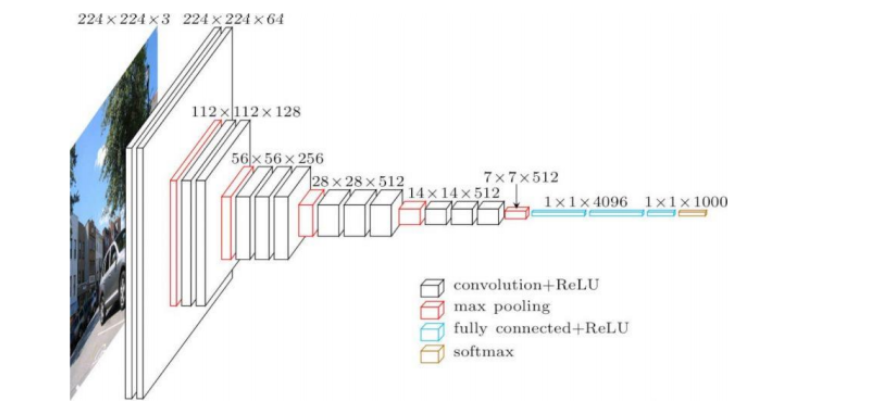

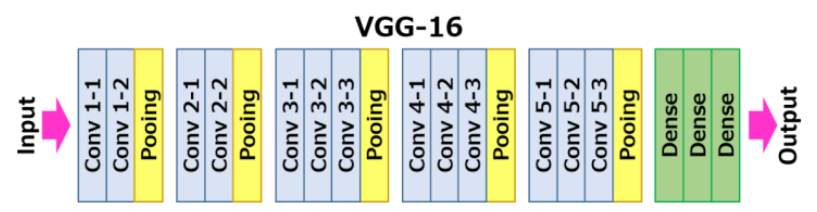

In [19]:
base_model = VGG16(include_top = False,weights = "imagenet", input_shape = (32,32,3))


58889256/58889256 [==============================] - 4s 0us/step


In [20]:
model3 = Sequential()
model3.add(base_model)
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 14848586 (56.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


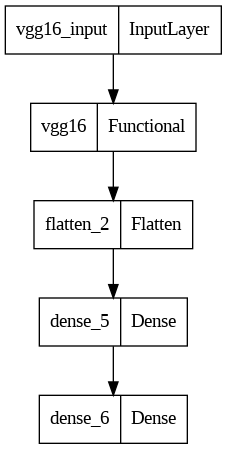

In [37]:
plot_model(model3)

In [28]:
history3 = model3.fit(x_train, y_train, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9694 - accuracy: 0.6626 - val_loss: 1.0142 - val_accuracy: 0.6587
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8012 - accuracy: 0.7261 - val_loss: 0.7880 - val_accuracy: 0.7335
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6879 - accuracy: 0.7708 - val_loss: 0.7807 - val_accuracy: 0.7472
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6077 - accuracy: 0.7972 - val_loss: 0.7220 - val_accuracy: 0.7629
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.5299 - accuracy: 0.8255 - val_loss: 0.6959 - val_accuracy: 0.7716
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4912 - accuracy: 0.8404 - val_loss: 0.7375 - val_accuracy: 0.7733
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.4328 - accuracy: 0.8595 - val_loss: 0.7419 -

In [29]:
vgg16_accuracy_test = model3.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(vgg16_accuracy_test[1]))
vgg16_accuracy_train = model3.evaluate(x_train, y_train)
print('Train Accuracy: {}'.format(vgg16_accuracy_test[1]))

313/313 [==============================] - 3s 10ms/step - loss: 0.7506 - accuracy: 0.7947
Test Accuracy: 0.794700026512146
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2570 - accuracy: 0.9213
Train Accuracy: 0.794700026512146


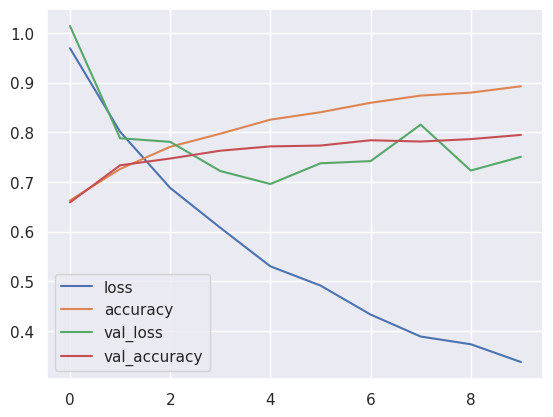

In [30]:
pd.DataFrame(history3.history).plot()
plt.show()

#### Plotting the Actual vs Predicted results

313/313 [==============================] - 2s 7ms/step


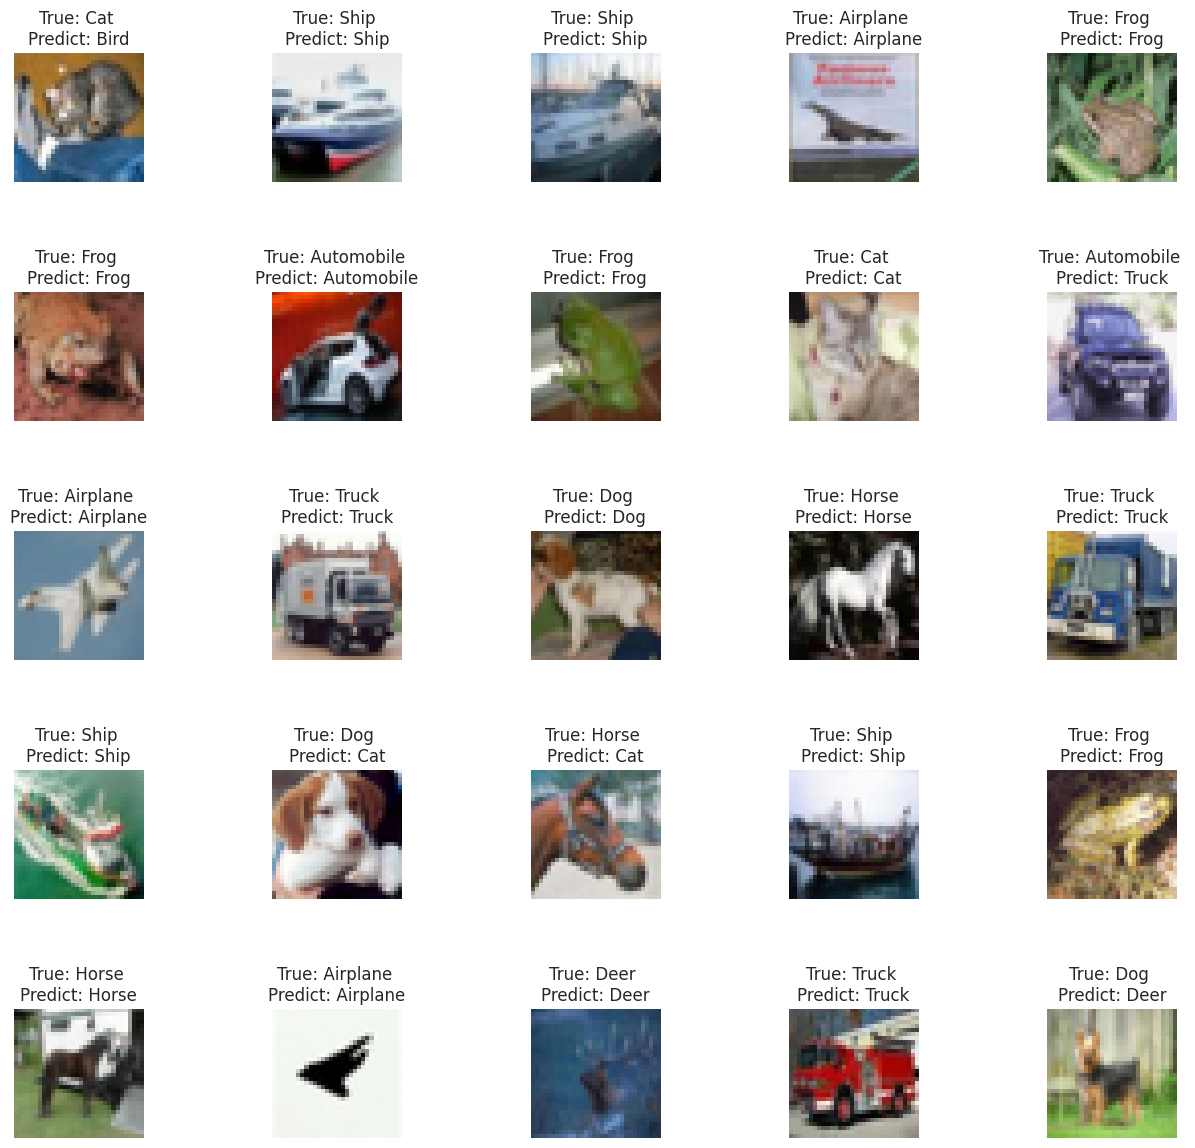

In [47]:
vgg16_pred = model3.predict(x_test)
vgg16_pred_classes = np.argmax(vgg16_pred, axis=1)

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[vgg16_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

#### Accuracy of different models in tabular form

In [31]:
Models=['Lenet-5','AlexNet','VGG16']
Trainacc=[Lenet5_accuracy_train[1],Alexnet_accuracy_train[1],vgg16_accuracy_train[1]]
Testacc=[Lenet5_accuracy_test[1],Alexnet_accuracy_test[1],vgg16_accuracy_test[1]]

In [32]:
Modelwise_accuracy=pd.DataFrame({'Model name':Models,'Train Accuracy':Trainacc,
                                'Test Accuracy':Testacc})
print(Modelwise_accuracy)

  Model name  Train Accuracy  Test Accuracy
0    Lenet-5         0.73950         0.6027
1    AlexNet         0.92720         0.8363
2      VGG16         0.92126         0.7947


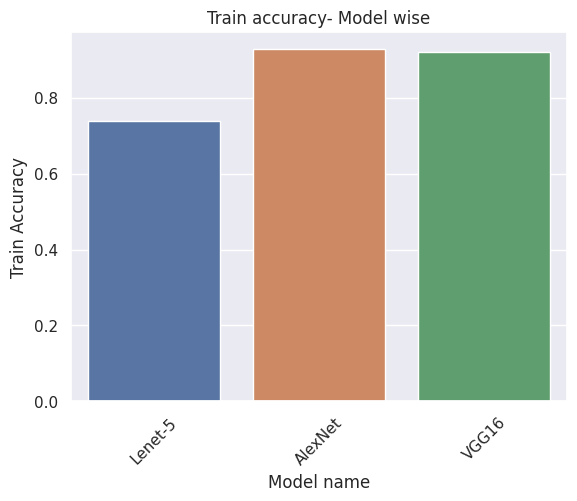

In [33]:
sns.barplot(x='Model name',y='Train Accuracy',data=Modelwise_accuracy)
plt.xticks(rotation=45)
plt.title('Train accuracy- Model wise')
plt.show()

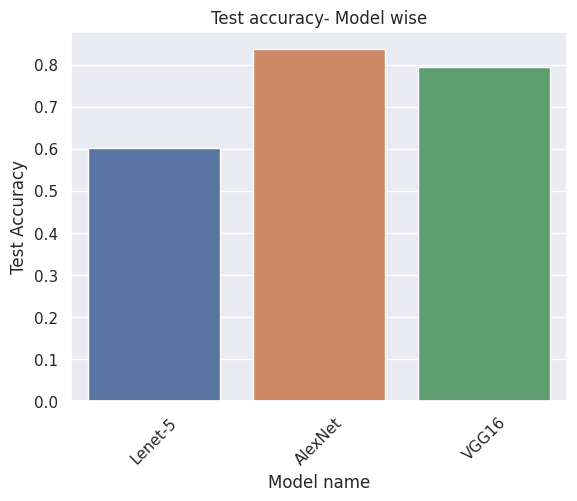

In [34]:
sns.barplot(x='Model name',y='Test Accuracy',data=Modelwise_accuracy)
plt.xticks(rotation=45)
plt.title('Test accuracy- Model wise')
plt.show()

#### Conclusion
- In this project I tried to build Convolutional Neural Network using Tensorflow and the Keras library.
- I tried to build 3 models - Lenet-5, AlexNet & VGG-16.
- The first step was to build CNN model using the model's architecture.
- The second step was to follow steps of  Deep Neural Network model.
- After compilation, model was trained followed by evaluation.
- Concluding the same we can say that
AlexNet has the highest Train & Test accuracy with 92% & 83% followed by VGG-16 having 92% train accuracy and 79% Test accuracy.
- Accuracy was the lowest for LeNet-5 model with 73% Train & 60% test accuracy.
- Visualization is given for actual vs predicted against each model to get a clear understanding of model's accuracy.

